In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("elections-us.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Page Name                                                                                                         10000 non-null  object 
 1   User Name                                                                                                         9618 non-null   object 
 2   Facebook Id                                                                                                       10000 non-null  int64  
 3   Page Category                                                                                                     10000 non-null  object 
 4   Page Admin Top Country       

In [5]:
# Convert object-type columns to string, except integer columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)

In [6]:
# Define the keyword to search for
keyword = "Trump"

# Count the occurrences of the keyword in the "Message" column
keyword_counts = df[df['Message'].str.contains(keyword, case=False)]['Page Name'].value_counts()

# Print the keyword occurrences
print(f"The keyword '{keyword}' appears {keyword_counts.sum()} times in the 'Message' column.")
print(f"The breakdown by page is:\n{keyword_counts}")

# Get the top 5 most shared posts that mention the keyword
top_shared_posts = (
    df[df['Message'].str.contains(keyword, case=False)]
    .sort_values(by='Shares', ascending=False)
    .head(5)
    [['Page Name', 'URL', 'Shares']]
)

print("\nTop 5 most shared posts that mention the keyword:")
print(top_shared_posts)

The keyword 'Trump' appears 1500 times in the 'Message' column.
The breakdown by page is:
Page Name
Informed Citizens United                 42
The Hill                                 41
The Western Journal                      40
Voz Media                                34
Right Side Broadcasting                  31
                                         ..
Brenna Bird for Attorney General          1
Joe Walsh                                 1
The Love Life Of An Asian Guy             1
Rocks and Cows of Minnesota               1
Harris County Democratic Party - HCDP     1
Name: count, Length: 497, dtype: int64

Top 5 most shared posts that mention the keyword:
           Page Name                                                URL  \
22  Occupy Democrats  https://www.facebook.com/100066647494924/posts...   
1   Occupy Democrats  https://www.facebook.com/100066647494924/posts...   
4           Fox News  https://www.facebook.com/100059396147148/posts...   
18  Occupy Democrats  http

The keyword 'Trump' appears 1500 times in the 'Message' column.
The keyword 'Biden' appears 1002 times in the 'Message' column.
The breakdown by page is:
Trump occurrences:
Page Name
Informed Citizens United                 42
The Hill                                 41
The Western Journal                      40
Voz Media                                34
Right Side Broadcasting                  31
                                         ..
Brenna Bird for Attorney General          1
Joe Walsh                                 1
The Love Life Of An Asian Guy             1
Rocks and Cows of Minnesota               1
Harris County Democratic Party - HCDP     1
Name: count, Length: 497, dtype: int64
Biden occurrences:
Page Name
The Western Journal                      47
Informed Citizens United                 31
Laguna Beach Democratic Club             30
The Hill                                 29
Voz Media                                29
                                         ..
R

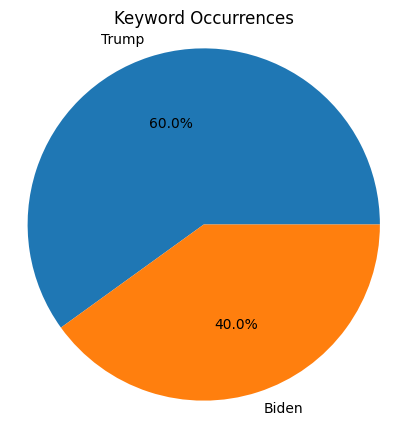

In [7]:
# Define the keywords to search for
keyword1 = "Trump"
keyword2 = "Biden"

# Count the occurrences of the keywords in the "Message" column
keyword1_counts = df[df['Message'].str.contains(keyword1, case=False)]['Page Name'].value_counts()
keyword2_counts = df[df['Message'].str.contains(keyword2, case=False)]['Page Name'].value_counts()

# Print the keyword occurrences
print(f"The keyword '{keyword1}' appears {keyword1_counts.sum()} times in the 'Message' column.")
print(f"The keyword '{keyword2}' appears {keyword2_counts.sum()} times in the 'Message' column.")
print(f"The breakdown by page is:")
print(f"{keyword1} occurrences:\n{keyword1_counts}")
print(f"{keyword2} occurrences:\n{keyword2_counts}")

# Plot the keyword occurrences as a pie chart
labels = [keyword1, keyword2]
sizes = [keyword1_counts.sum(), keyword2_counts.sum()]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Keyword Occurrences')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.show()